**Set environment**

In [1]:
import numpy as np
import itertools as it
import os, sys
import gzip
import re

import hicstraw
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
from matplotlib  import pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt 
import seaborn as sns

sys.path.append('..')
from config.config_sing import *
show_env()

You are in Singularity: singularity_proj_encode_fcc
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log



In [2]:
txt_folder = "aggregate_crispri_hcrff_window20kb_bin200"

In [3]:
txt_fdiry = os.path.join(
    FD_RES,
    "results",
    "hic_intact_K562_deep",
    "coverage_aggregate",
    txt_folder
)
os.listdir(txt_fdiry)

['location_pair.TSS.crispri_hcrff.chr6.npy',
 'location_pair.TSS.crispri_hcrff.chr11.npy',
 'location_pair.TSS.crispri_hcrff.chr4.npy',
 'location_pair.TSS.crispri_hcrff.chr12.npy',
 'location_pair.TSS.crispri_hcrff.chrX.npy',
 'location_pair.TSS.crispri_hcrff.chr8.npy',
 'location_pair.TSS.crispri_hcrff.chr5.npy']

In [4]:
def fun_read(txt_fpath):
    with open(txt_fpath, 'rb') as file:
        arr = np.load(file)
    return arr
    
txt_fdiry = os.path.join(
    FD_RES,
    "results",
    "hic_intact_K562_deep",
    "coverage_aggregate",
    txt_folder
)
txt_fnames = os.listdir(txt_fdiry)

lst = list()
for txt_fname in txt_fnames:
    txt = os.path.join(txt_fdiry, txt_fname)
    arr = fun_read(txt)
    lst.append(arr)
    print(arr.shape)
    
arr = np.concatenate(lst)
arr_hic_agg_map = arr
print(arr.shape)

(14, 201, 201)
(57, 201, 201)
(11, 201, 201)
(4, 201, 201)
(6, 201, 201)
(18, 201, 201)
(3, 201, 201)
(113, 201, 201)


In [38]:
import pandas as pd

In [41]:
arr = arr_hic_agg_map
arr = arr.ravel()
dat = pd.DataFrame(arr)
dat.describe().round(2)

,0
count,4565313.00
mean,1.34
std,43.92
min,0.00
25%,0.00
50%,0.00
75%,1.33
max,22778.69


In [5]:
def plot_hic_map(dense_matrix, vmin, vmax, cmap, ax=None):
    d2 = dense_matrix
    d2[np.isnan(d2)] = 0
    d2[np.isinf(d2)] = 0
    
    if ax:
        img = ax.matshow( d2, cmap=cmap, vmin=vmin, vmax=vmax)
    else:
        img = plt.matshow(d2, cmap=cmap, vmin=vmin, vmax=vmax)
    return img

/tmp/ipykernel_56759/3917562096.py:4: RuntimeWarning: divide by zero encountered in log2
  arr = np.log2(arr)


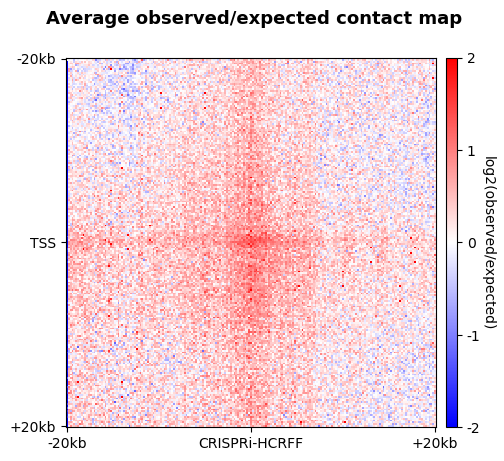

In [35]:
###
arr = arr_hic_agg_map
arr = np.apply_along_axis(np.mean, 0, arr)
arr = np.log2(arr)

### plot heatmap image
fig, ax = plt.subplots(nrows=1, ncols=1)
img = plot_hic_map(arr, -2, 2, 'bwr', ax=ax)

###
ax.xaxis.set_ticks_position("bottom")
ax.set_xticks([0, 100, arr.shape[0]-1])
ax.set_yticks([0, 100, arr.shape[1]-1])
ax.set_xticklabels(["-20kb", "CRISPRi-HCRFF", "+20kb"])
ax.set_yticklabels(["-20kb", "TSS",  "+20kb"])

### Plot colorbar
### https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph
divider = make_axes_locatable(ax)
cax  = divider.append_axes("right", size="3%", pad=0.1)
cbar = fig.colorbar(img, cax=cax, ticks=[-2, -1, 0, 1, 2])
cbar.ax.set_ylabel('log2(observed/expected)', rotation=270, fontsize=10, labelpad=10)
cbar.ax.set_yticklabels(["-2", "-1", "0", "1", "2"], fontsize=10)

fig.suptitle("Average observed/expected contact map", fontsize=13, weight='bold')
fig.savefig("fig.hic.average_contact_map.crispri_hcrff.pdf", bbox_inches='tight')
plt.show()

/tmp/ipykernel_56759/2075267826.py:3: RuntimeWarning: divide by zero encountered in log2
  arr = np.log2(arr)


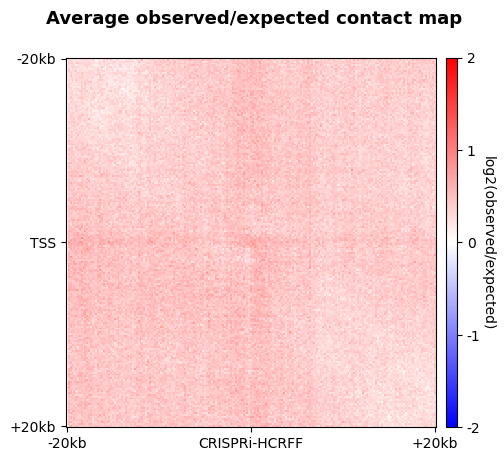

In [34]:
###
arr = arr_hic_agg_map
arr = np.log2(arr)
arr[np.isinf(arr)] = 0
arr = np.apply_along_axis(np.mean, 0, arr)

### plot heatmap image
fig, ax = plt.subplots(nrows=1, ncols=1)
img = plot_hic_map(arr, -2, 2, 'bwr', ax=ax)

###
ax.xaxis.set_ticks_position("bottom")
ax.set_xticks([0, 100, arr.shape[0]-1])
ax.set_yticks([0, 100, arr.shape[1]-1])
ax.set_xticklabels(["-20kb", "CRISPRi-HCRFF", "+20kb"])
ax.set_yticklabels(["-20kb", "TSS",  "+20kb"])

### Plot colorbar
### https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph
divider = make_axes_locatable(ax)
cax  = divider.append_axes("right", size="3%", pad=0.1)
cbar = fig.colorbar(img, cax=cax, ticks=[-2, -1, 0, 1, 2])
cbar.ax.set_ylabel('log2(observed/expected)', rotation=270, fontsize=10, labelpad=10)
cbar.ax.set_yticklabels(["-2", "-1", "0", "1", "2"], fontsize=10)

fig.suptitle("Average observed/expected contact map", fontsize=13, weight='bold')
plt.show()